Use kernel of Power Spectrum

In [133]:
''' Read in files '''
frequency = pd.read_csv('data/swell/freq.txt', header=None, names=['freq'])
freq = np.array(frequency.freq)
angle = pd.read_csv('data/swell/theta.txt', header=None, names=['theta'])
theta = np.array(angle.theta)
theta[0] = 0
E = pd.read_csv('data/swell/E.txt', header=None)
F = E.to_numpy()

[240.] [0.07594999]


<Figure size 3120x2340 with 0 Axes>

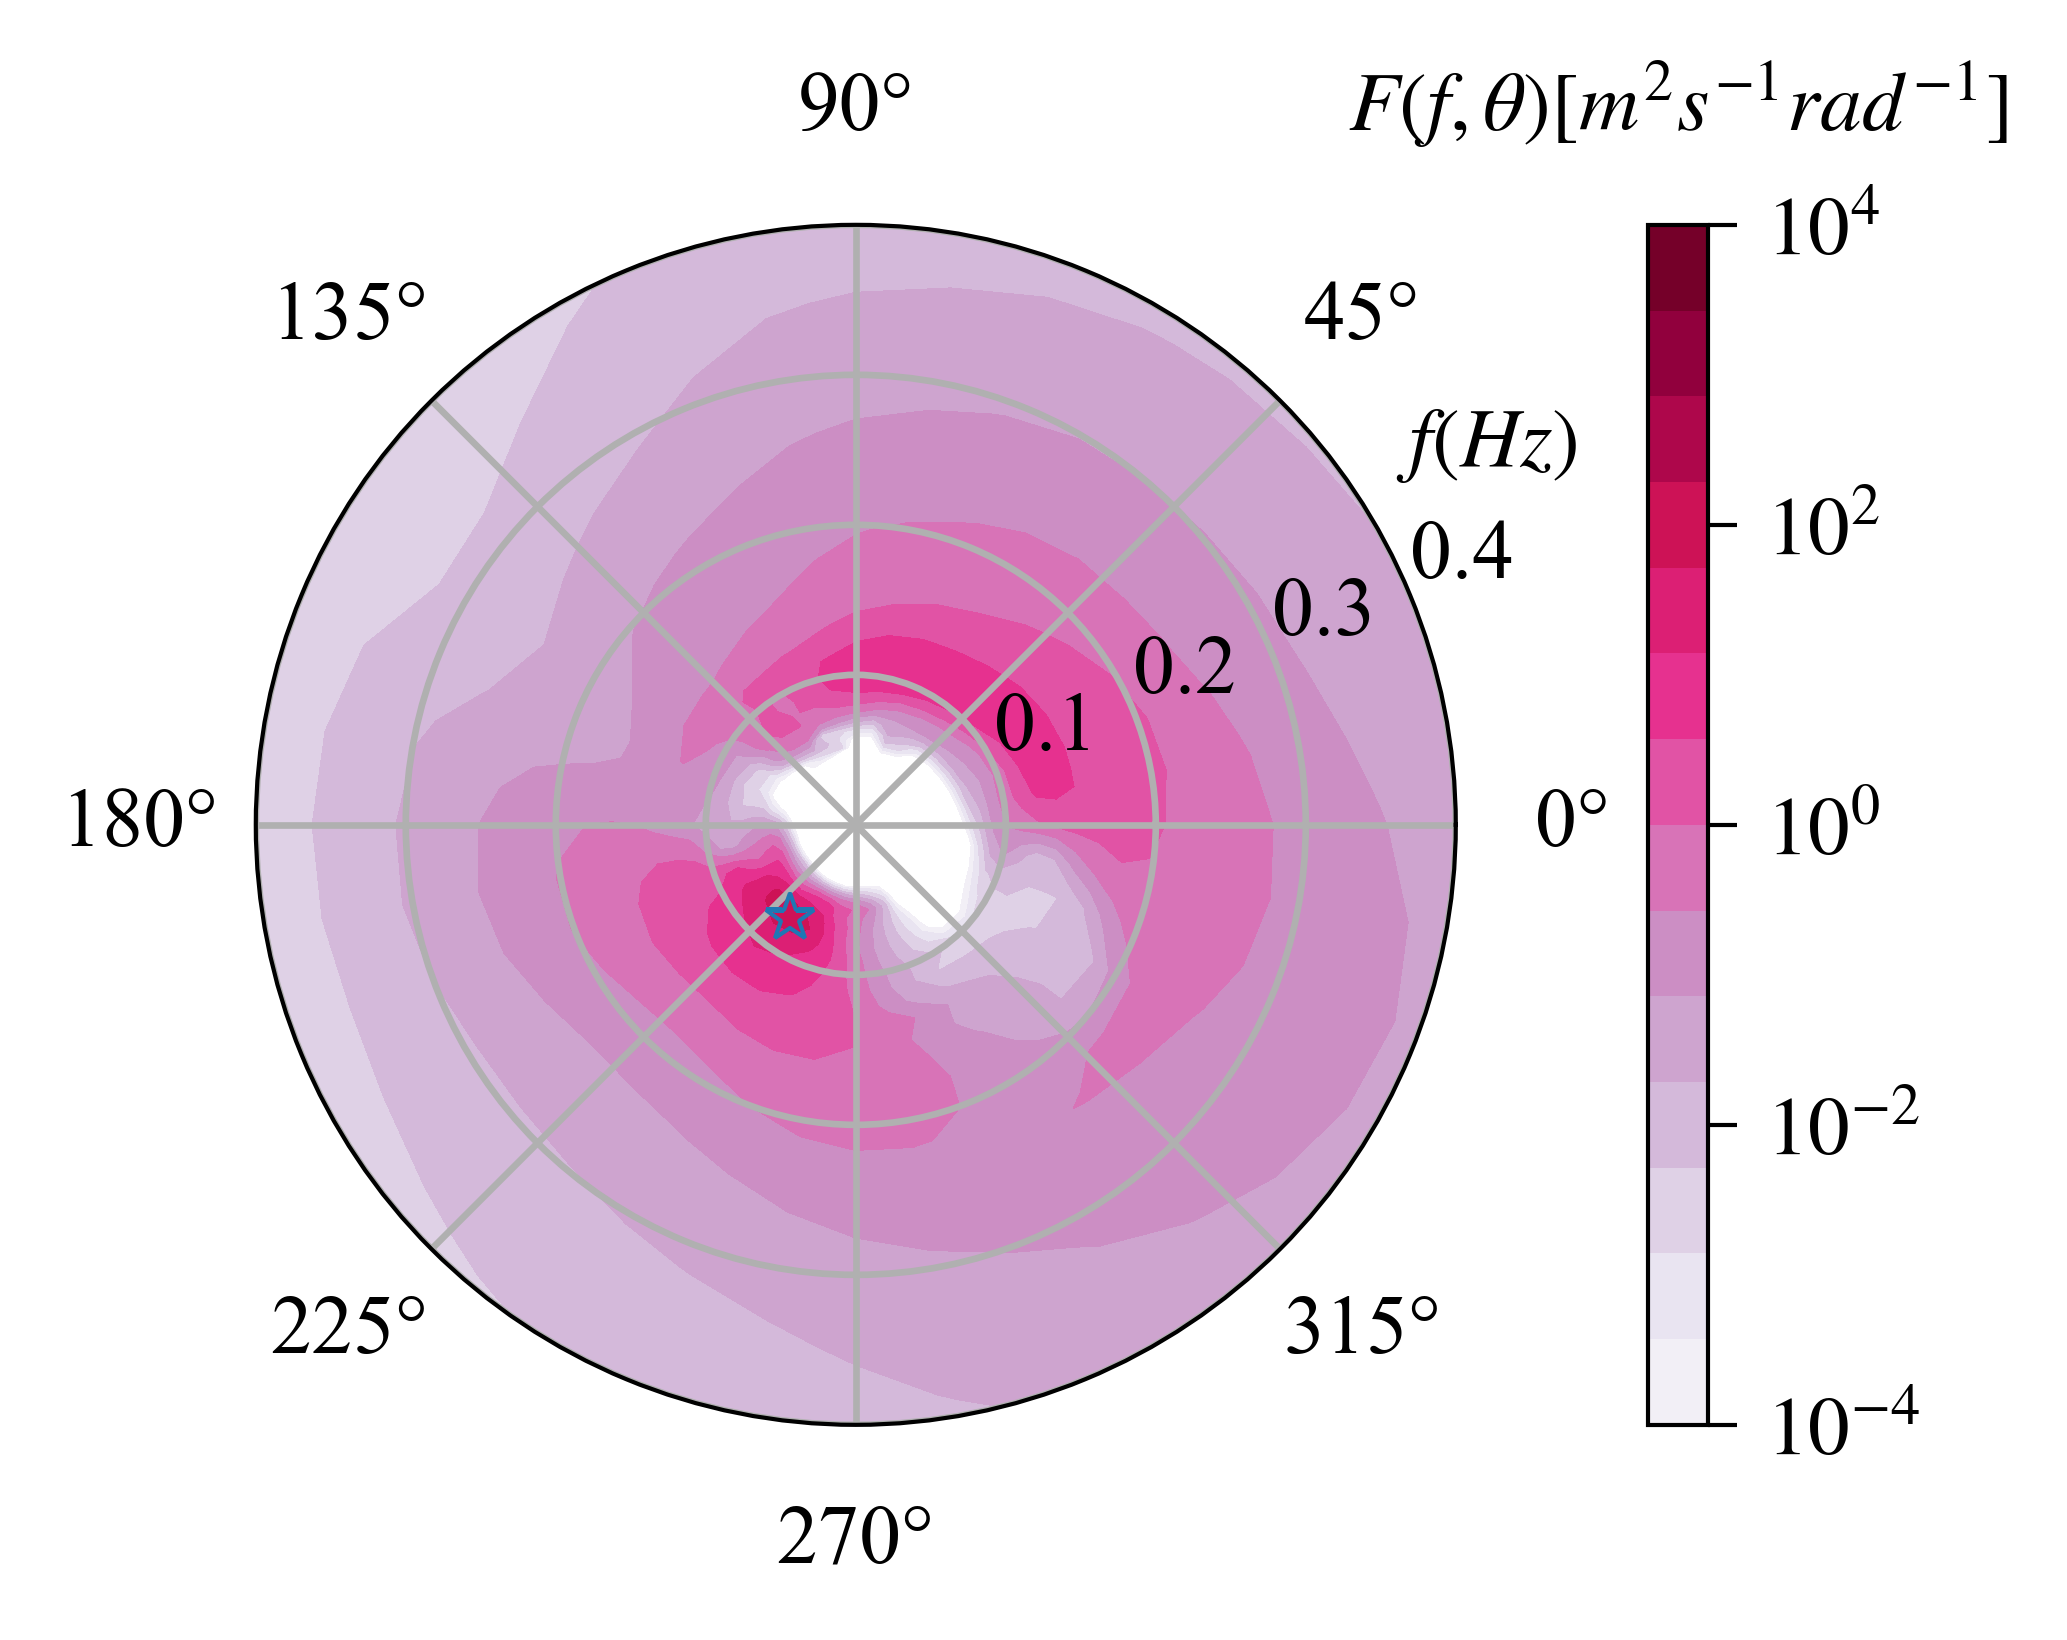

In [282]:
''' Plotting the swell - wind sea mixed spectrum in frequency '''
def make_polar_plot(thetas, radii, F_rtheta):
    plt.clf()
    fig = plt.figure(figsize=[4,2.5])
    ax = fig.add_axes([0.1,0.1,0.8,0.8], polar=True)
#     img = ax.pcolormesh(thetas, radii, np.rot90(F_rtheta)[::-1,:], edgecolors='white', lw=0.1, cmap='PuRd') # F_rtheta axis0: increasing thetas, axis1: increasing radii
    img = ax.contourf(thetas, radii, np.rot90(F_rtheta)[::-1,:], cmap='PuRd', levels=np.linspace(-4,4,15),
                      vmin=-4, vmax=4) # F_rtheta axis0: increasing thetas, axis1: increasing radii
    index = np.where(np.rot90(F_rtheta)[::-1,:]==np.max(F_rtheta))
    print(thetas[index[1]]*180/np.pi, radii[index[0]])
    ax.plot(thetas[index[1]]-5/180*np.pi, radii[index[0]], '*', mfc="None", mew=0.5)
    cbar = fig.colorbar(img, orientation="vertical", fraction=0.046, pad=0.1, ticks=[-4,-2,0,2,4])
    cbar.ax.set_yticklabels(['$10^{-4}$','$10^{-2}$','$10^{0}$','$10^{2}$','$10^{4}$'])
    cbar.ax.text(0.5, 1.1, r'$F(f,\theta) [m^2 s^{-1} rad^{-1}]$', ha='center', va='center', transform=cbar.ax.transAxes)
    ax.text(0.95, 0.8, '$f(Hz)$', transform=ax.transAxes)
    ax.set_ylim([0,0.4])
    ax.set_yticks([0.1,0.2,0.3,0.4])

theta_pad = np.append(theta, 360) 
lastrow = np.reshape(F[0,:], (1,len(F[0,:]))) # Just to fill the gap of the plot
F_pad = np.concatenate((F, lastrow), 0)
make_polar_plot((theta_pad)/180*np.pi, freq, np.log10(F_pad))

[1.61136391e-03 1.94975040e-03 2.35919835e-03 2.85463012e-03
 3.45410222e-03 4.17946442e-03 5.05715184e-03 6.11915407e-03
 7.40417553e-03 8.95905437e-03 1.08404561e-02 1.31169515e-02
 1.58715100e-02 1.92045288e-02 2.32374835e-02 2.81173576e-02
 3.40220032e-02 4.11666233e-02 4.98116175e-02 6.02720608e-02
 7.29291896e-02 8.82443354e-02 1.06775642e-01 1.29198555e-01
 1.56330256e-01 1.89159623e-01 2.28883158e-01 2.76948633e-01
 3.35107888e-01 4.05480529e-01 4.90631532e-01 5.93664200e-01
 7.18333723e-01 8.69183827e-01 1.05171242e+00 1.27257221e+00
 1.53981232e+00 1.86317310e+00 2.25443935e+00 2.72787173e+00
 3.30072523e+00 3.99387743e+00]
[230.] [0.01920453]
-0.20106192982974677 0.20106192982974677


(-0.64, 0.64, -0.64, 0.64)

<Figure size 3120x2340 with 0 Axes>

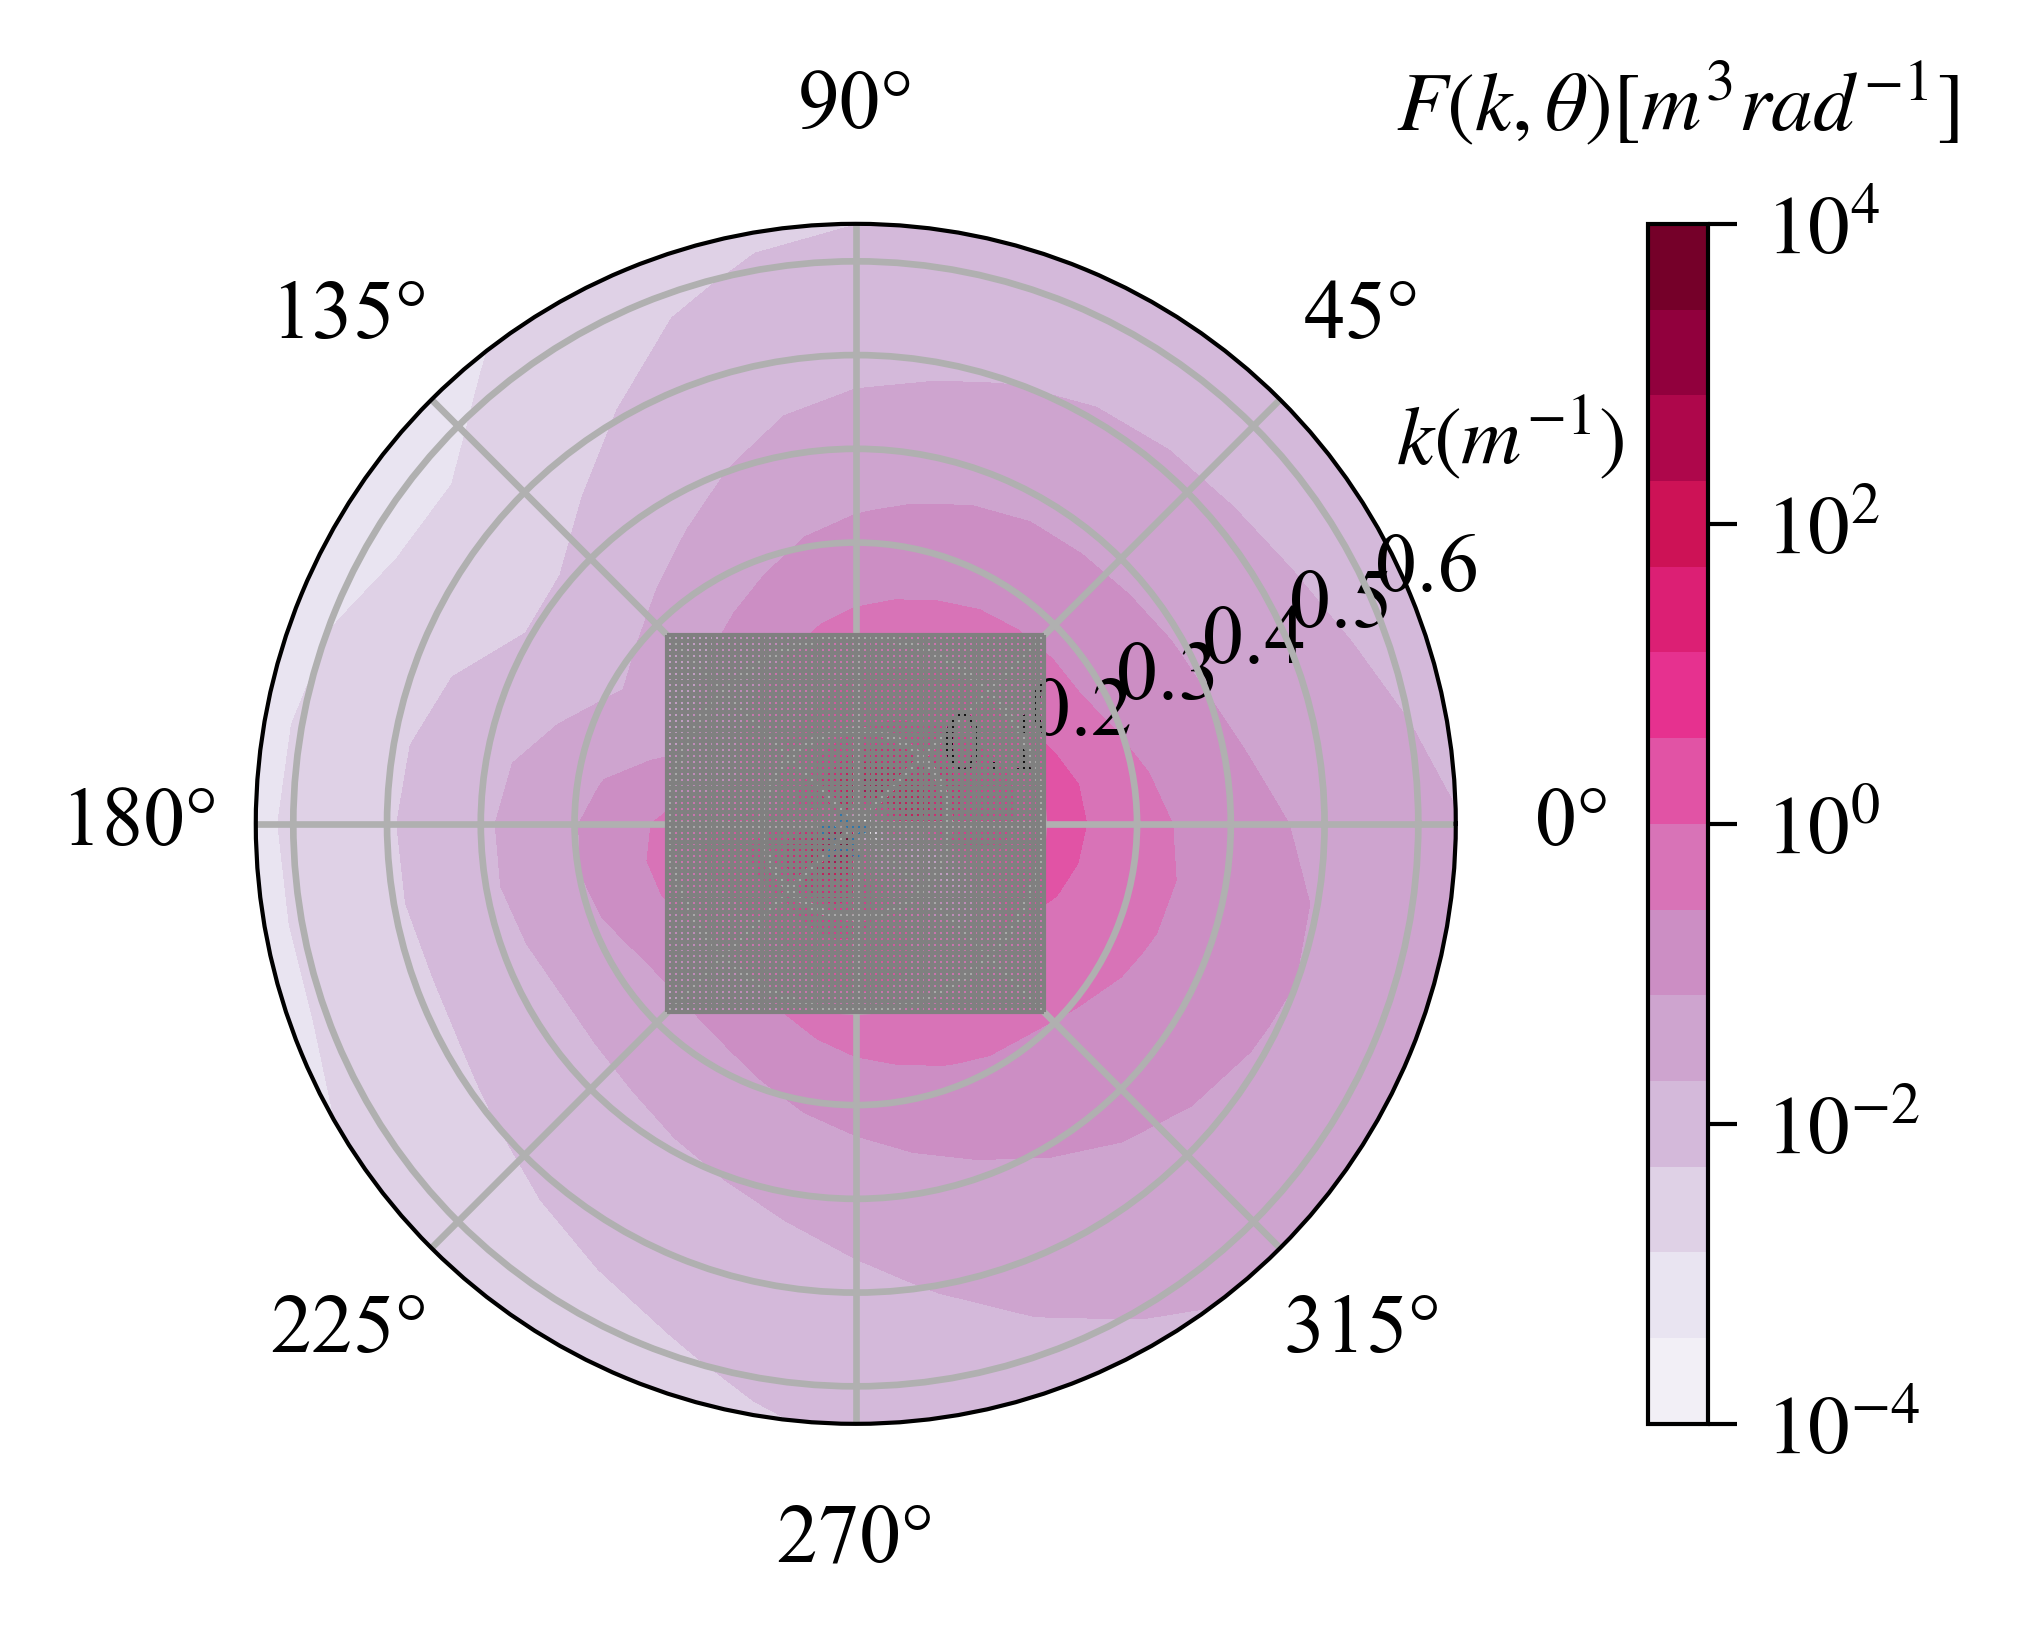

In [431]:
''' Converting f to k '''
def make_polar_plot(thetas, radii, F_rtheta):
    plt.clf()
    fig = plt.figure(figsize=[4,2.5])
    ax = fig.add_axes([0.1,0.1,0.8,0.8], polar=True)
    img = ax.contourf(thetas, radii, np.rot90(F_rtheta)[::-1,:], cmap='PuRd', levels=np.linspace(-4,4,15),
                      vmin=-4, vmax=4) # F_rtheta axis0: increasing thetas, axis1: increasing radii
    index = np.where(np.rot90(F_rtheta)[::-1,:]==np.max(F_rtheta))
    print(thetas[index[1]]*180/np.pi, radii[index[0]])
    ax.plot(thetas[index[1]]-5/180*np.pi, radii[index[0]], '*', mfc="None", mew=0.5)
    cbar = fig.colorbar(img, orientation="vertical", fraction=0.046, pad=0.1, ticks=[-4,-2,0,2,4])
    cbar.ax.set_yticklabels(['$10^{-4}$','$10^{-2}$','$10^{0}$','$10^{2}$','$10^{4}$'])
    cbar.ax.text(0.5, 1.1, r'$F(k,\theta) [m^3 rad^{-1}]$', ha='center', va='center', transform=cbar.ax.transAxes)
    ax.text(0.95, 0.8, '$k(m^{-1})$', transform=ax.transAxes)
    ax.set_ylim([0,0.64])
    return fig, ax
    
theta_pad = np.append(theta, 360) 
lastrow = np.reshape(F[0,:], (1,len(F[0,:]))) # Just to fill the gap of the plot
F_pad = np.concatenate((F, lastrow), 0)
freq_tile, theta_tile = np.meshgrid(freq, theta_pad)
F_ktheta = F_pad*9.8**2/(32*np.pi**4*freq_tile**3)
kmod = 4*np.pi**2*freq**2/9.8
kmod_tile, theta_tile = np.meshgrid(kmod,theta_pad)
# F_ktheta = F_pad*0.5*9.8**0.5*kmod_tile**(-1.5)/2/np.pi
print(kmod)
fig, ax = make_polar_plot((theta_pad)/180*np.pi, kmod, np.log10(F_ktheta))

# the carthesian axis: showing kx, ky grid
axc = fig.add_axes(ax.get_position(), frameon=False)
N_mode = 64; L = 1000
kx = np.arange(-N_mode/2,N_mode/2+1)*2*np.pi/L # based on the grid, interval can't go smaller then pi/L
ky = np.arange(-N_mode/2,N_mode/2+1)*2*np.pi/L
print(ky[0],ky[-1])
axc.set_xlim([-0.64,0.64]); axc.set_ylim([-0.64,0.64])
for i in range(0,len(kx)):
    axc.vlines(kx[i], lw=0.5, ymin=ky[0], ymax=ky[-1], color='gray')
for i in range(0,len(ky)):
    axc.hlines(ky[i], lw=0.5, xmin=kx[0], xmax=kx[-1], color='gray')
axc.axis('off')

(array([24]), array([14]))
[0.07594999] [240]


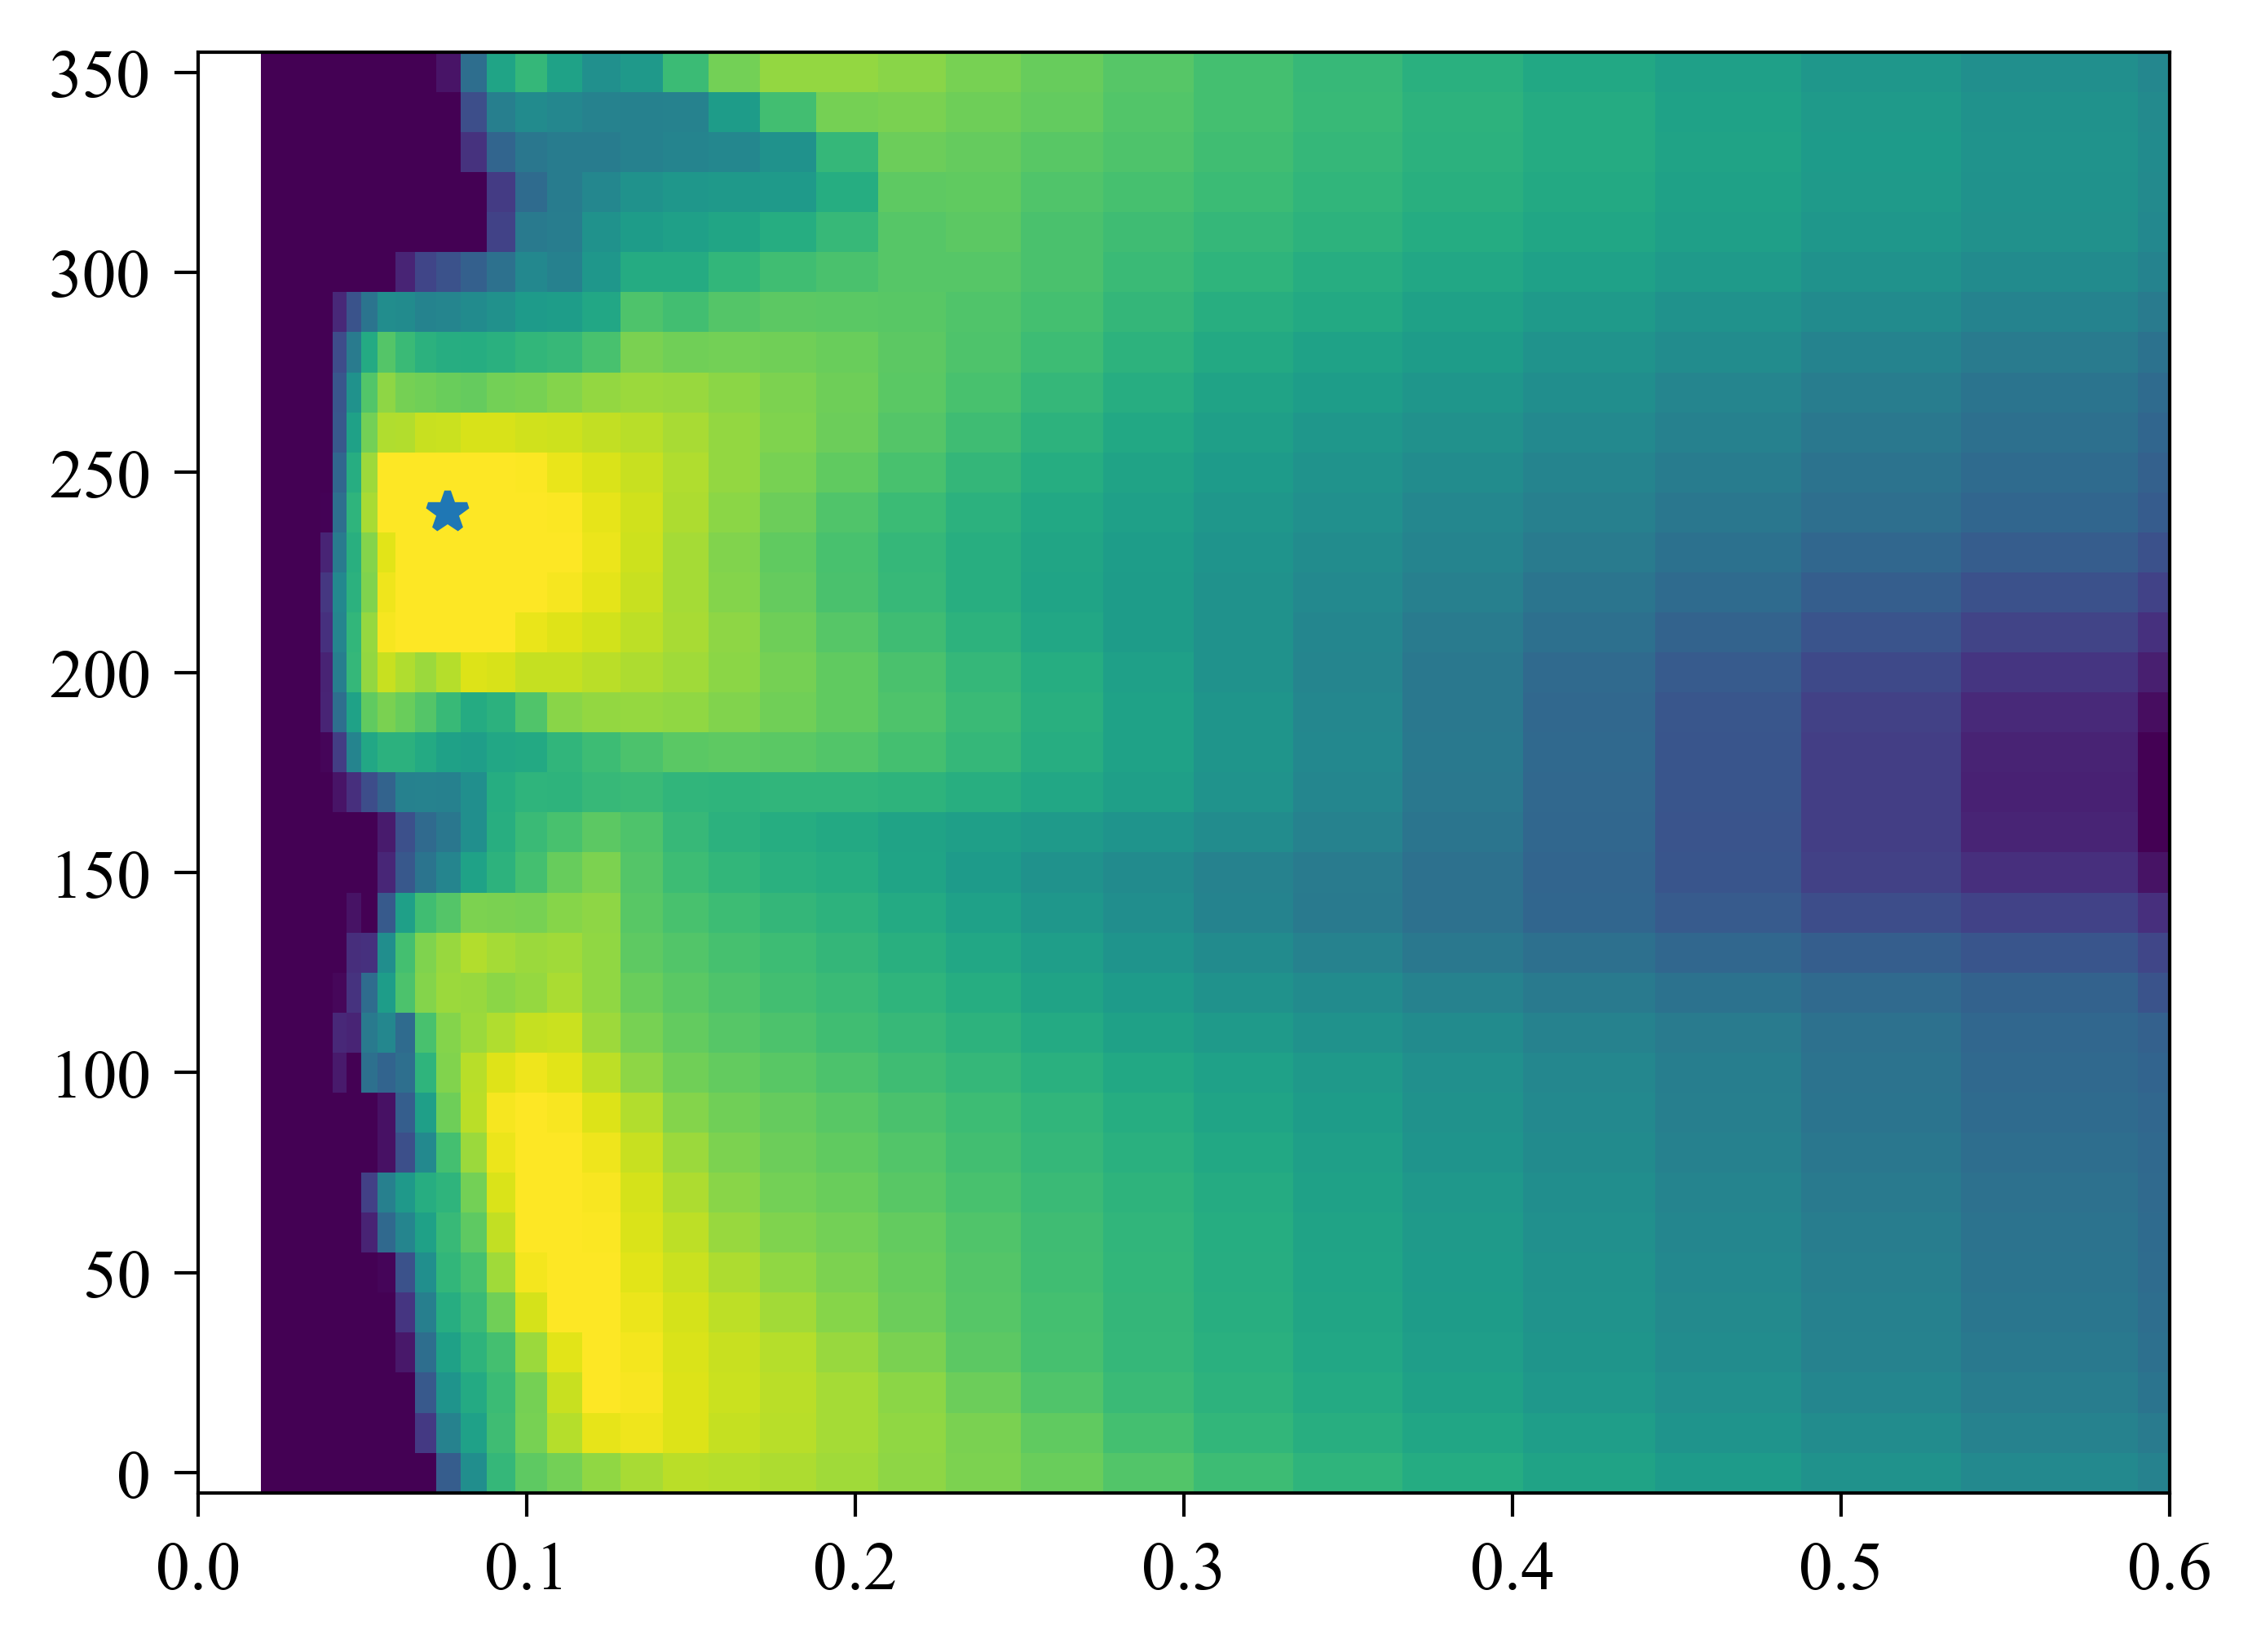

In [224]:
plt.pcolormesh(freq, theta, np.log(F), vmax=2, vmin=-11)
plt.xlim([0,0.6])
index = np.where(F==F.max())
print(index)
print(freq[index[1]], theta[index[0]])
plt.plot(freq[index[1]], theta[index[0]], '*')

In [189]:
''' Compute the wave height as sanity check '''
freq_tile, theta_tile = np.meshgrid(freq, theta)
dfreq = freq - np.roll(freq, 1) ; dfreq[0] = 0
dfreq_tile = np.tile(dfreq, (36, 1))
Hs = np.sum(F*10/180*np.pi*dfreq_tile)**0.5*4
print('Significant wave height %g m' %Hs)

Significant wave height 6.15126


In [335]:
from scipy.interpolate import LinearNDInterpolator, griddata

# Function to convert polar to cartesian and interpolate
def cart2pol(x, y):
    rho = np.sqrt(x**2 + y**2)
    phi = np.arctan2(y, x)
    return(rho, phi)
def pol2cart(rho, phi):
    x = rho * np.cos(phi)
    y = rho * np.sin(phi)
    return(x, y)

In [283]:
''' Read in files, convert freq, theta, F into right shape '''
frequency = pd.read_csv('data/swell/freq.txt', header=None, names=['freq'])
freq = np.array(frequency.freq)
angle = pd.read_csv('data/swell/theta.txt', header=None, names=['theta'])
theta = np.array(angle.theta)
theta[0] = 0
E = pd.read_csv('data/swell/E.txt', header=None)
F = E.to_numpy()

In [416]:
theta_pad = np.append(theta,360)/180*np.pi  # Remember to convert to radian!
lastrow = np.reshape(F[0,:], (1,len(F[0,:]))) # Just to fill the gap of the plot
F_pad = np.concatenate((F, lastrow), 0)
freq_tile, theta_tile = np.meshgrid(freq, theta_pad)
F_ktheta = F_pad*9.8**2/(32*np.pi**4*freq_tile**3)
kmod = 4*np.pi**2*freq**2/9.8
kmod_tile, theta_tile = np.meshgrid(kmod,theta_pad)
F_kmodtheta_tile = F_ktheta

In [397]:
dkmod = kmod - np.roll(kmod, 1) ; dkmod[0] = 0
dkmod_tile = np.tile(dkmod, (37, 1))
Hs = np.sum(F_ktheta*10/180*np.pi*kmod_tile*dkmod_tile)**0.5*4
print(Hs)

6.05112245903193


In [417]:
L = 1000; level=10 # or L=1200, level=11
N_mode = 64; L = 1000
kx = np.arange(-N_mode/2,N_mode/2+1)*2*np.pi/L # based on the grid, interval can't go smaller then pi/L
ky = np.arange(-N_mode/2,N_mode/2+1)*2*np.pi/L

In [418]:
## """ Uniform grid in kx,ky """
N_mode = 64; L = 1000 
kx = np.arange(-N_mode/2,N_mode/2+1)*2*np.pi/L # based on the grid, interval can't go smaller then pi/L
ky = np.arange(-N_mode/2,N_mode/2+1)*2*np.pi/L

kx_tile, ky_tile = np.meshgrid(kx,ky)
kxp_tile, kyp_tile = pol2cart(kmod_tile, theta_tile)
""" Project from uniform k to uniform kx,ky """
F_kxky_tile = griddata((kxp_tile.ravel(), kyp_tile.ravel()), F_kmodtheta_tile.ravel(), (kx_tile, ky_tile), 
                        method='linear', fill_value=0) # Interpolate from kxp,kyp (uniform in k) to kx,ky (uniform in kx,ky)


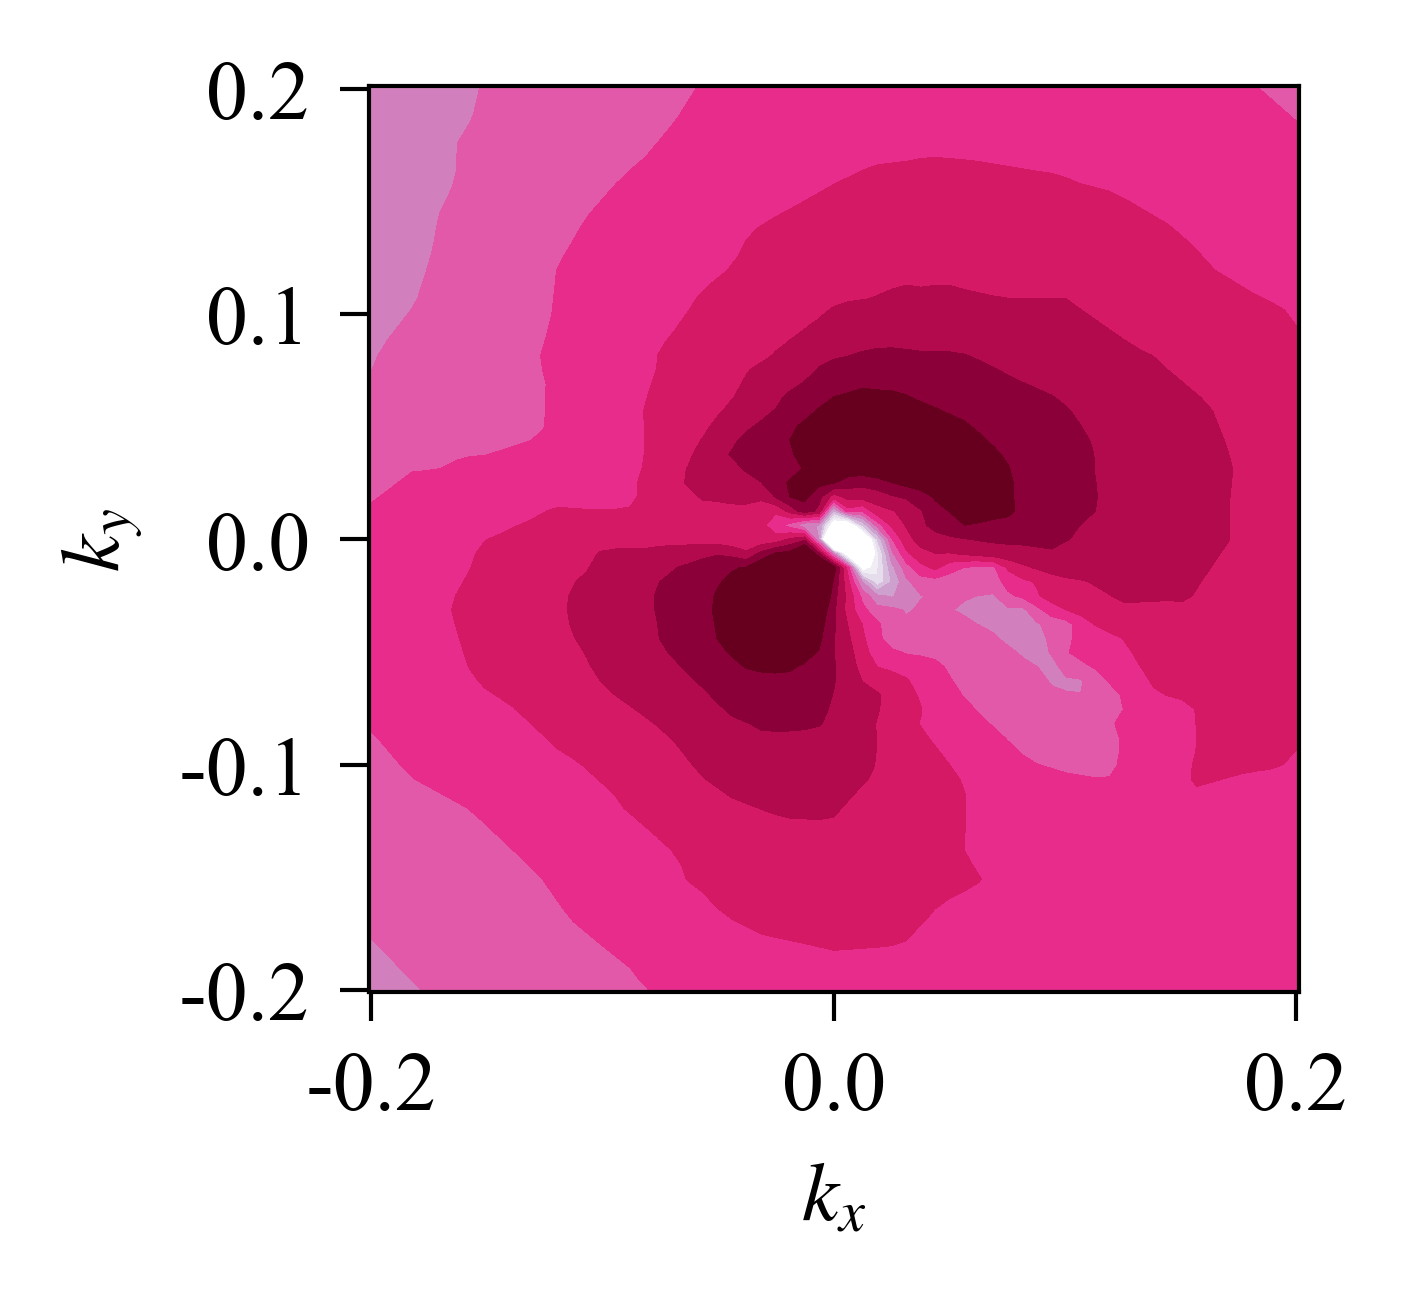

In [420]:
fig = plt.figure(figsize=[2,2]); ax=plt.gca()
img = ax.contourf(kx, ky, np.log10(F_kxky_tile), cmap='PuRd', levels=np.linspace(-4,4,15), vmin=-4, vmax=2)
plt.xlabel('$k_x$'); plt.ylabel('$k_y$');

In [421]:
fF1 = open("/projects/DEIKE/jiarongw/multilayer/kx_swell1", 'bw')
F_output = kx.astype('float32'); F_output.tofile(fF1)
fF2 = open("/projects/DEIKE/jiarongw/multilayer/ky_swell1", 'bw')
F_output = ky.astype('float32'); F_output.tofile(fF2)

fF = open("/projects/DEIKE/jiarongw/multilayer/F_kxky_swell1", 'bw')
F_output = F_kxky_tile.astype('float32'); F_output.tofile(fF)
F_output.shape

(65, 65)

In [378]:
Fsimu = pd.read_csv('F-0', header=None, delimiter=' ')
Fsimu = np.array(Fsimu)
Fsimu = Fsimu[0,0:-1]

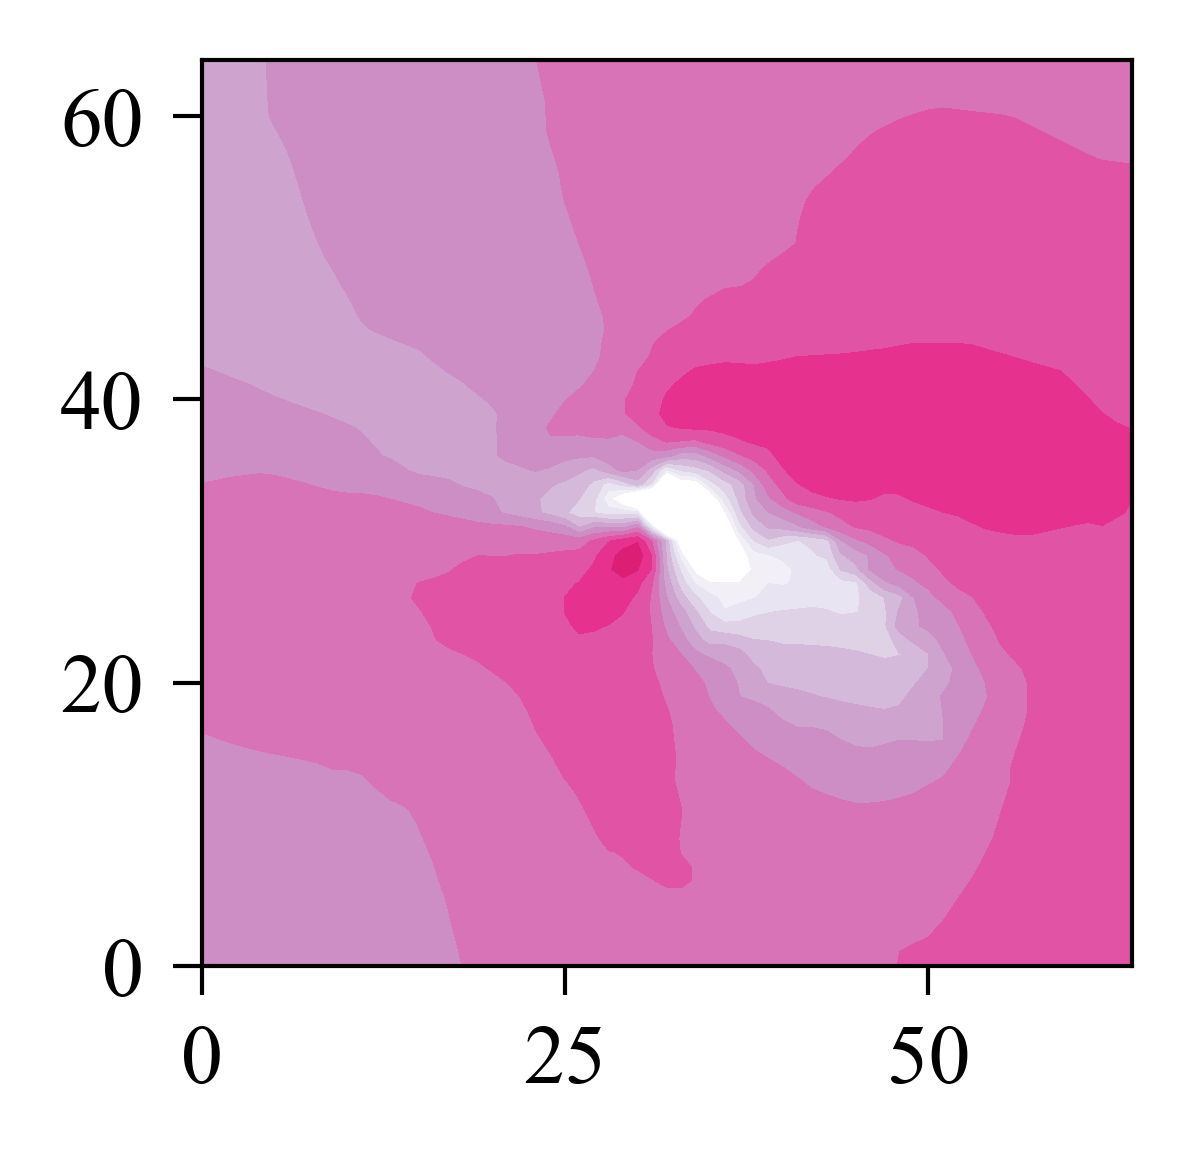

In [382]:
Fsimu = np.reshape(Fsimu, (65,65))
fig = plt.figure(figsize=[2,2]); ax=plt.gca()
img = ax.contourf(np.log10(Fsimu), cmap='PuRd', levels=np.linspace(-4,2,15), vmin=-4, vmax=2)

In [383]:
def eta_random(t, N_grid, kx_tile, ky_tile, F_kxky_tile, dkx, dky, omega_tile):
    # This is the only place that the random field is generated, everything else should agree;
    # and we want to seed the random number
    np.random.seed(0) 
    tb = 40; xb = 0; yb = 0
    phase_tile = -kx_tile*xb-ky_tile*yb+np.random.random_sample(kx_tile.shape)*2*np.pi # Add a random phase field
    #phase_tile = -kx_tile*xb-ky_tile*yb+omega_tile*tb+np.random.random_sample(kx_tile.shape)*5 # Add a random phase field
    eta_tile = np.zeros(x_tile.shape)
    for i1 in range(0,N_grid):
        for i2 in range(0,N_grid):
            ampl = (2*F_kxky_tile*dkx*dky)**0.5
            # How to exactly represent integrate over dk_x*dk_y*eta_hat?
            # mode = (F_kdirectional**0.5)*np.cos((kx_tile*x_tile[i1,i2]+ky_tile*y_tile[i1,i2])+
            #                                    phase_tile)*(kmod_tile*(kmod[1]-kmod[0])*(theta[1]-theta[0])) # uniform space in k and theta
            a = (kx_tile*x_tile[i1,i2]+ky_tile*y_tile[i1,i2])-omega_tile*t+phase_tile
            mode = ampl*(np.cos(a)) # uniform spacing in kx and ky
            eta_tile[i1,i2] = np.sum(mode)    
    return eta_tile, phase_tile

In [422]:
N_grid = 1024; L = 1000
x = np.linspace(-L/2,L/2,N_grid); y = np.linspace(-L/2,L/2,N_grid)
x_tile, y_tile = np.meshgrid(x, y)
kmod_cart_tile, theta_cart_tile = cart2pol(kx_tile,ky_tile)
omega_tile = (9.8*kmod_cart_tile)**0.5 # frequency based on kx or kmod
dkx = kx_tile[0,1]-kx_tile[0,0]; dky = ky_tile[1,0]-ky_tile[0,0]
eta_tile, phase_tile = eta_random(0, N_grid, kx_tile, ky_tile, F_kxky_tile, dkx, dky, omega_tile)
Hs = np.var(eta_tile)**0.5*4

In [432]:
dkx

0.006283185307179612

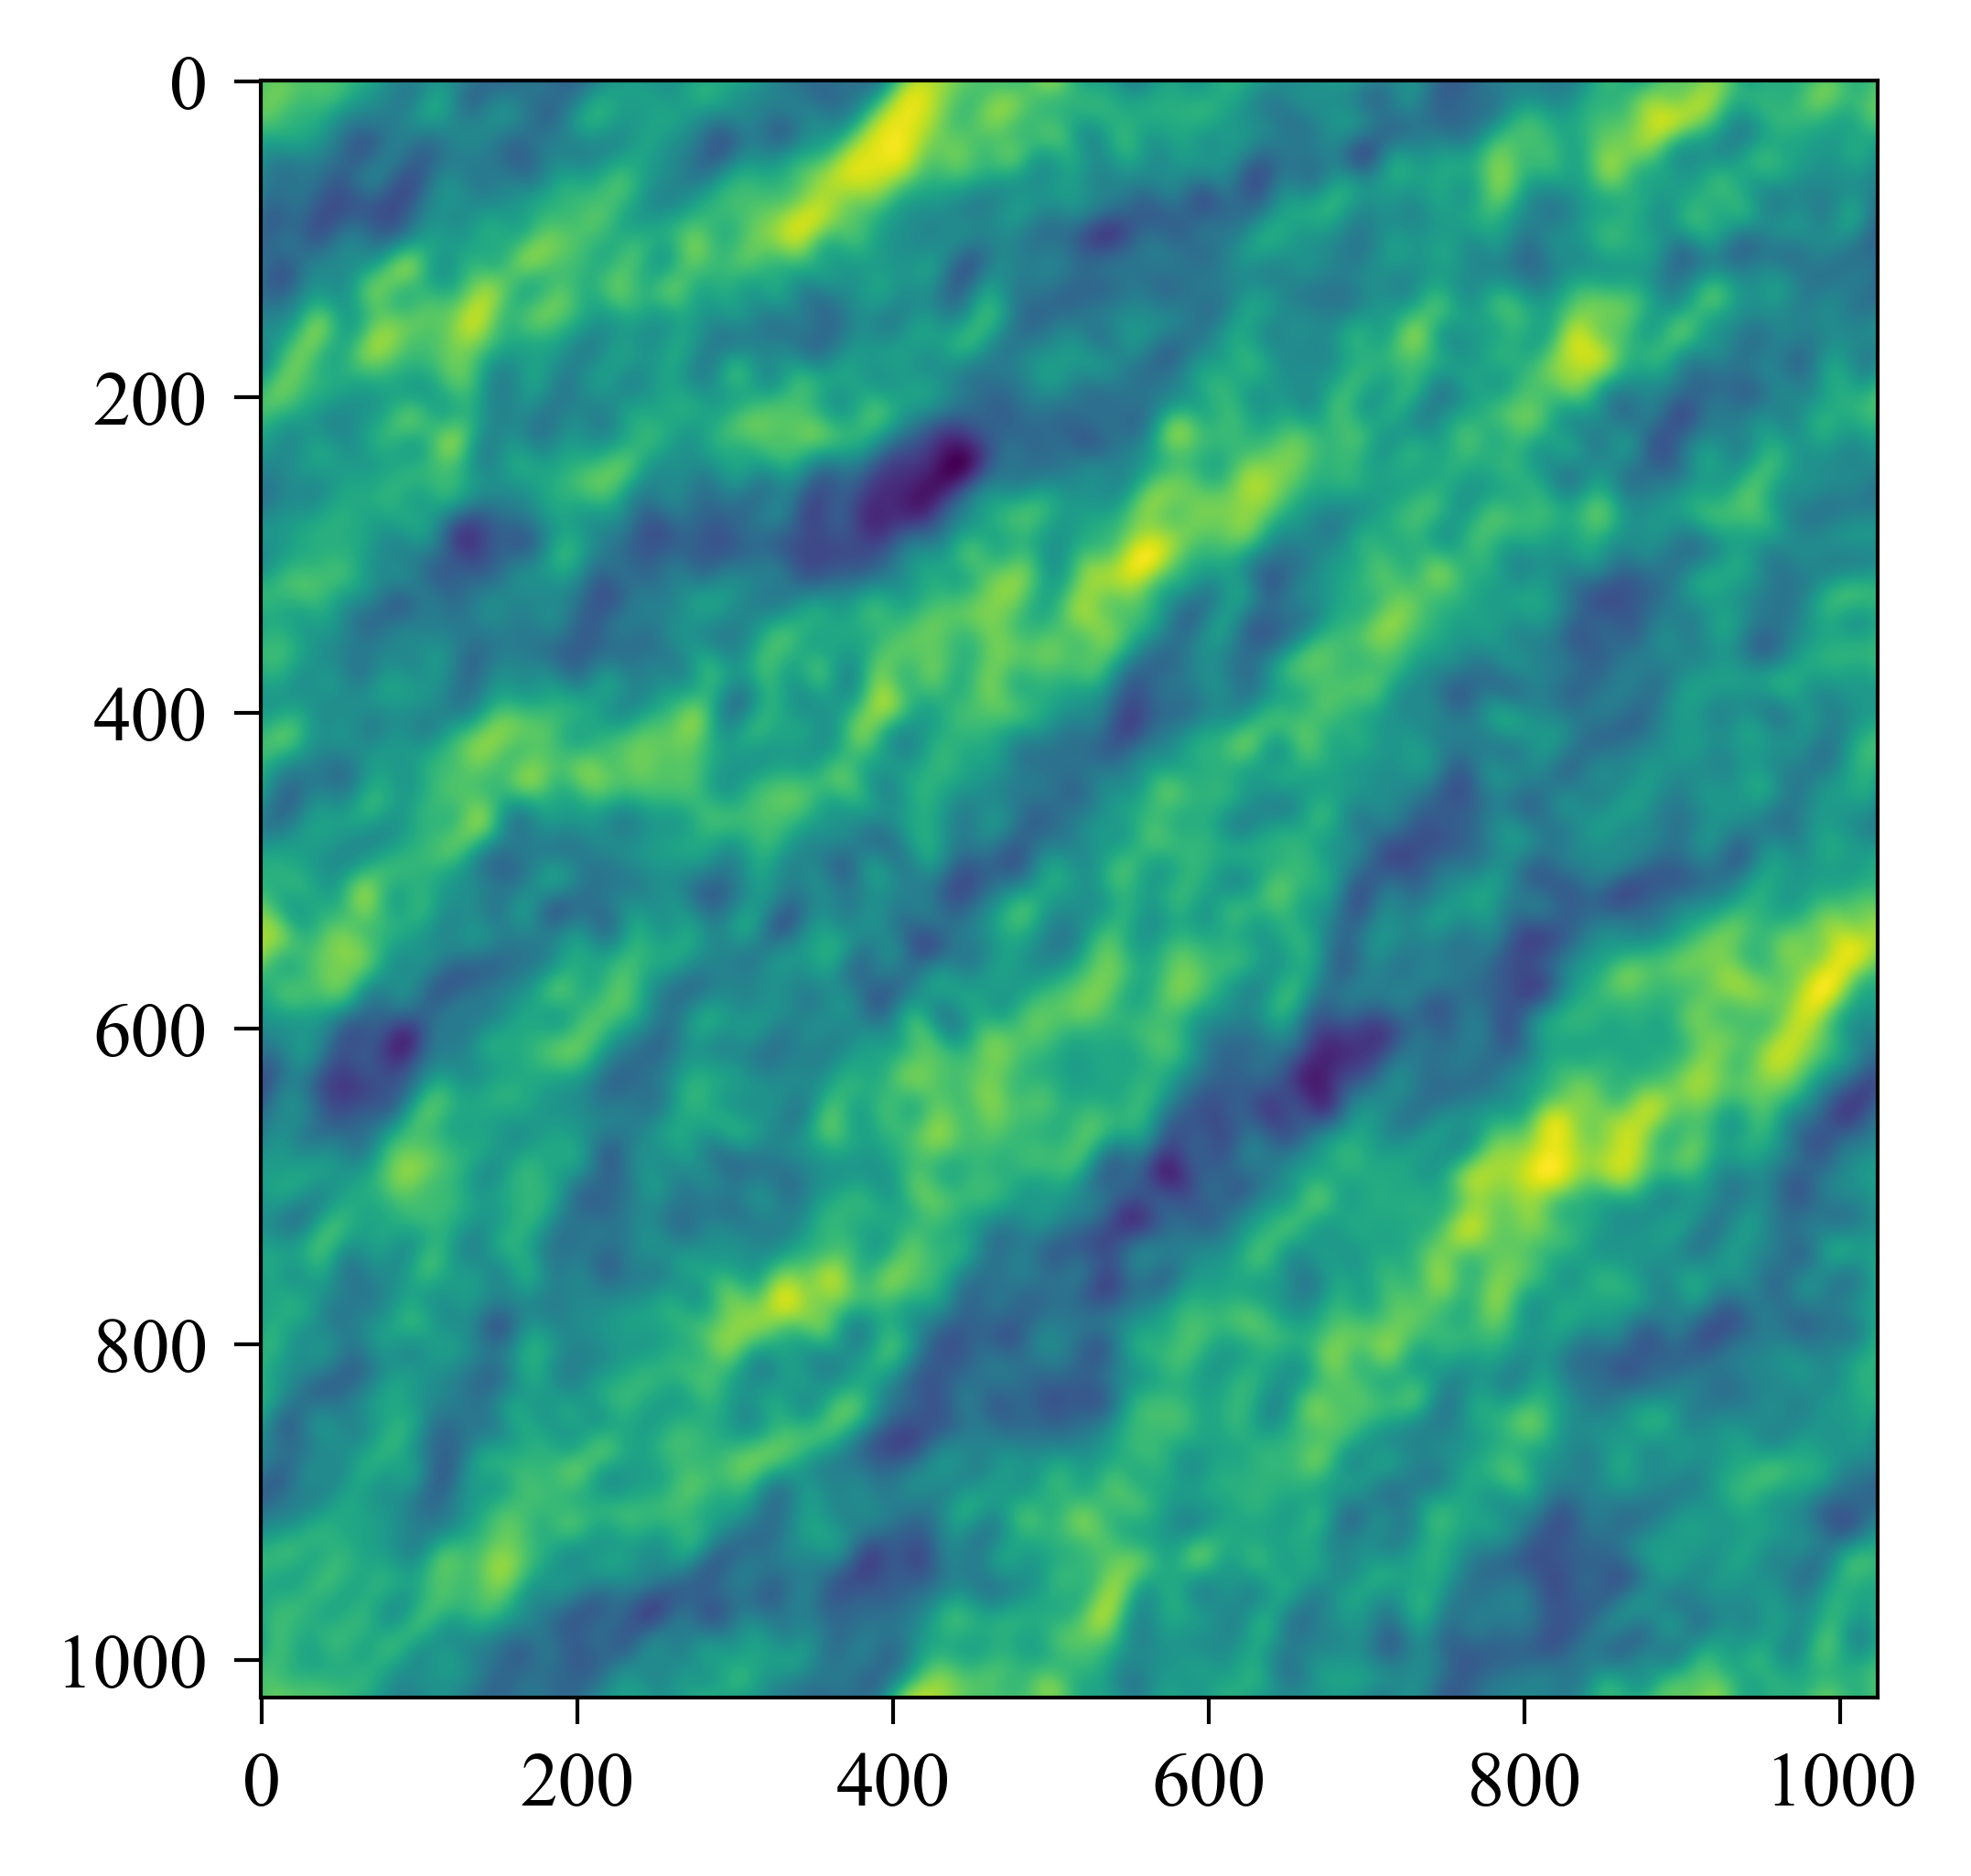

In [424]:
plt.imshow(eta_tile)

In [386]:
def make_r_theta_vals(xs,ys,F_xy,ntheta=100,nr=100):    
    rmax = (xs.max()**2 + ys.max()**2)**0.5
    radii = np.linspace(0, rmax, nr, endpoint=True)
    thetas = np.linspace(0, 2*np.pi, ntheta, endpoint=True)
    r_tile, theta_tile = np.meshgrid(radii, thetas)
    xp_tile, yp_tile = pol2cart(r_tile, theta_tile) # The xs and ys correponding to the POLAR radii and thetas
    x_tile, y_tile = np.meshgrid(xs, ys)
    F_rtheta = griddata((x_tile.ravel(), y_tile.ravel()), F_xy.ravel(), (xp_tile, yp_tile), method='nearest')
    return radii, thetas, F_rtheta

In [ ]:
theta = np.arange(-N/2,N/2)/(N)*2*np.pi
k = wavenumber[0:int(N/2)]
dk = k[1]-k[0]; dtheta = theta[1]-theta[0]
F_center = np.fft.fftshift(F)/dkx/dky # Further normalization by independent variables
k_tile, theta_tile = np.meshgrid(k,theta)
kxp_tile, kyp_tile = pol2cart(k_tile, theta_tile)
F_center_polar = griddata((kx_tile.ravel(),ky_tile.ravel()), F_center.ravel(), (kxp_tile, kyp_tile), method='nearest')
F_center_polar_integrated = np.sum(F_center_polar*k_tile, axis=0)*dtheta

In [433]:
import pandas as pd
import numpy as np
import math
import os
from matplotlib import pyplot as plt
import matplotlib as mpl
import sys
from scipy.interpolate import griddata
from tqdm import tqdm
# sys.path.append('/Users/jiarong/Google Drive/codes/jiarongw-postprocessing/functions')
sys.path.append('/projects/DEIKE/jiarongw/jiarongw-postprocessing/jupyter_notebook/functions/')
from fio import readin
# plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/pof.mplstyle')
plt.style.use('/projects/DEIKE/jiarongw/jiarongw-postprocessing/media/matplotlib/stylelib/jfm.mplstyle')

In [434]:
from func import array_to_mesh, read_t

In [435]:
class Case(object):
    """ This class defines methods specific to cases.
        Attributes: 
            self.NL 
    """
    def __init__(self, NL=20, LEVEL=8, path='/projects/DEIKE/jiarongw/multilayer/stokes/stokes_8_20_Htheta0.51/'):
        self.NL = NL 
        self.LEVEL = LEVEL
        self.path = path    

In [436]:
def plot_func(t, ax):
    global case
    Nh = 2**case.LEVEL; Nl = case.NL; L = case.L; H = case.H
    [h_ensem, ux_ensem, uy_ensem, uz_ensem] = read_t(fieldnames=['h','ux','uy','uz'], t=t, Nh=Nh, Nl=Nl, path=case.path)
    x_mesh, y_mesh, z_mesh = array_to_mesh (h_ensem, L0=L, H=H, Nh=Nh, Nl=Nl)
    yslice = 128
    image = ax.pcolormesh(x_mesh[:,:,yslice], z_mesh[:,:,yslice], ux_ensem[:,:,yslice], shading='flat', cmap='RdBu_r')
    ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/5,0,L/10])
    ax.set_ylim([-L/5, L/10])
    ''' Plot the surface '''
    xarray = np.linspace(-L/2,L/2,Nh,endpoint=False) + L/Nh/2
    ax.plot(xarray,np.sum(h_ensem[:,:,128],axis=0)-H,lw=0.5,c='k')
    return image, x_mesh, y_mesh, z_mesh, ux_ensem, uy_ensem, uz_ensem

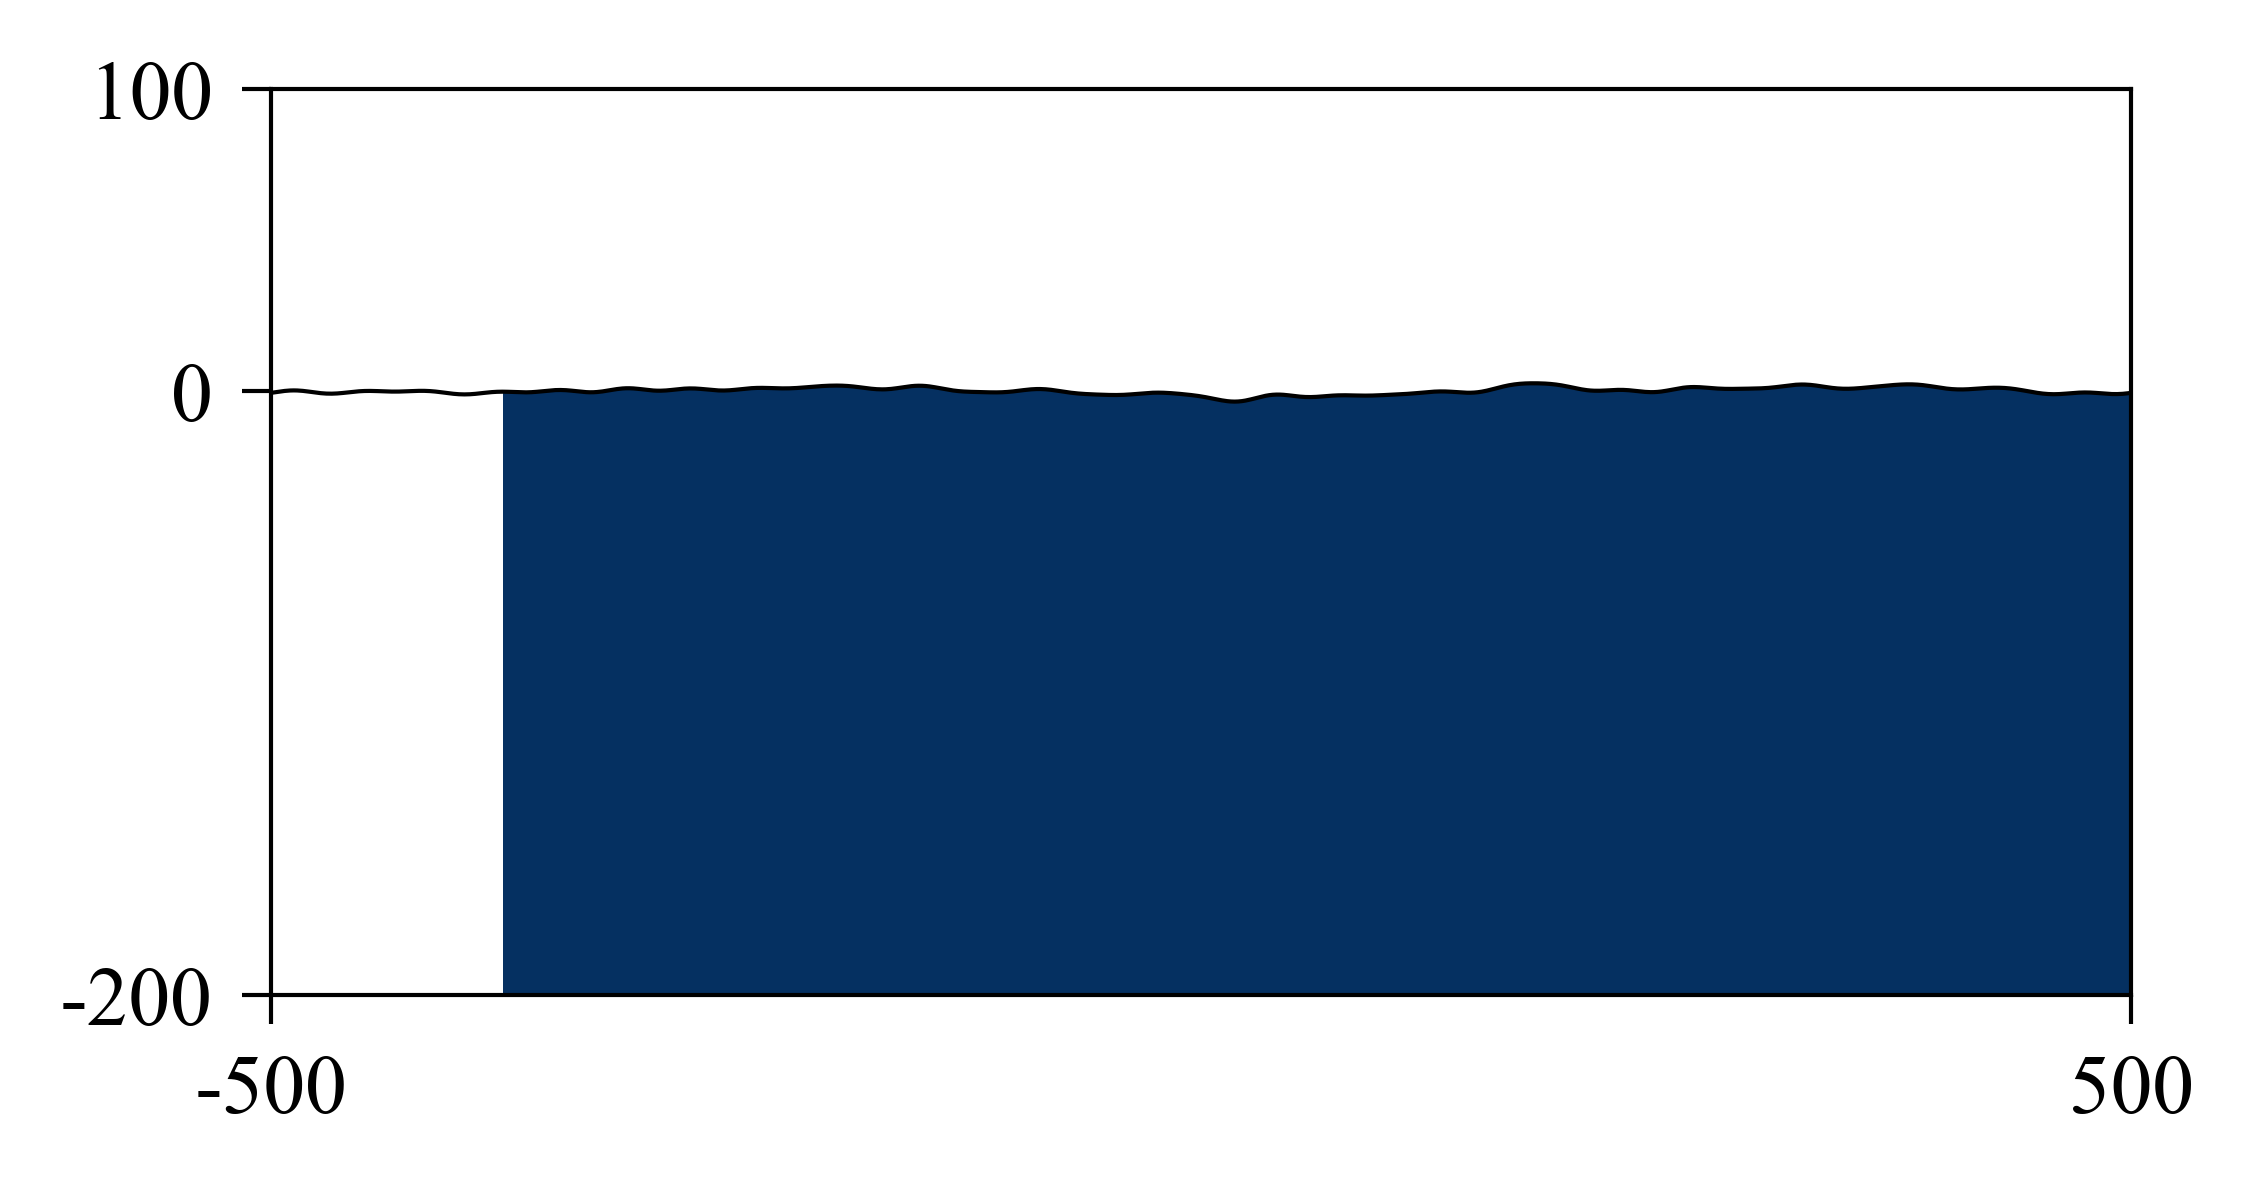

In [437]:
case_field2 = Case(NL=30, LEVEL=10, path='/projects/DEIKE/jiarongw/multilayer/swell/field_swell1/')
case = case_field2
case.L = 1000; case.H = 200; 
fig = plt.figure (figsize=[4,2]); ax = plt.gca()
t = 0
image, x_mesh2, y_mesh2, z_mesh2, ux_mesh2, uy_mesh2, uz_mesh2 = plot_func(t, ax)

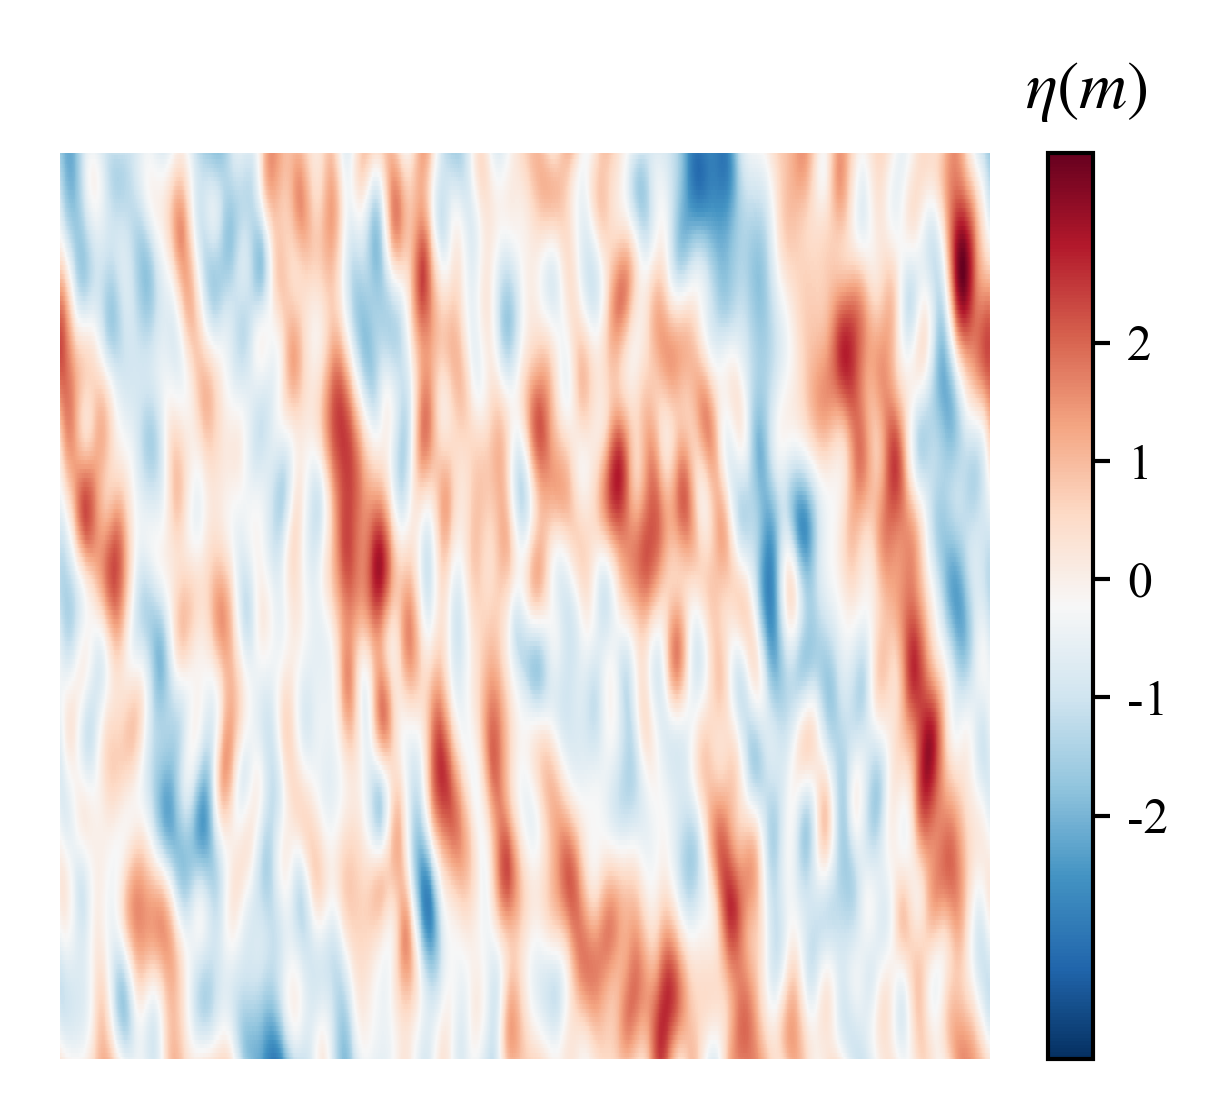

In [451]:
fig = plt.figure (figsize=[2.5,2]); ax = plt.gca()
yslice = 128; L = 200; Nh = 1024

ax.set_xticks([-L/2,L/2]); ax.set_yticks([-L/2,0,L/2])
ax.set_ylim([-L/2, L/2])
image = plt.pcolormesh(x_mesh2[-1,:,:], y_mesh2[-1,:,:], uz_mesh2[-1,:,:], shading='flat', 
                       cmap='RdBu_r')
# image = plt.pcolormesh(x_mesh2[-1,:,:], y_mesh2[-1,:,:], omegax_mesh2[-1,:,:], shading='flat', 
#                        cmap='RdBu_r', vmax=0.4, vmin=-0.4)
# image = plt.pcolormesh(x_mesh2[-1,:,:], y_mesh2[-1,:,:], omegaz_mesh2[-1,:,:], shading='flat', 
#                        cmap='RdBu_r', vmax=0.4, vmin=-0.4)

cbar = plt.colorbar(image, orientation='vertical')
cbar.ax.text(-0.5, 1.05, r'$\eta (m)$', transform=cbar.ax.transAxes, fontsize=8)
cbar.set_ticks([-2,-1,0,1,2])
# cbar.ax.text(-0.5, 1.05, r'$\omega_x (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
# cbar.set_ticks([-0.4,-0.2,0,0.2,0.4])
# cbar.ax.text(-0.5, 1.05, r'$\omega_z (s^{-1})$', transform=cbar.ax.transAxes, fontsize=8)
# cbar.set_ticks([-0.4,-0.2,0,0.2,0.4])

plt.axis('off')
cbar.ax.tick_params(labelsize=6, length=2, pad=2)

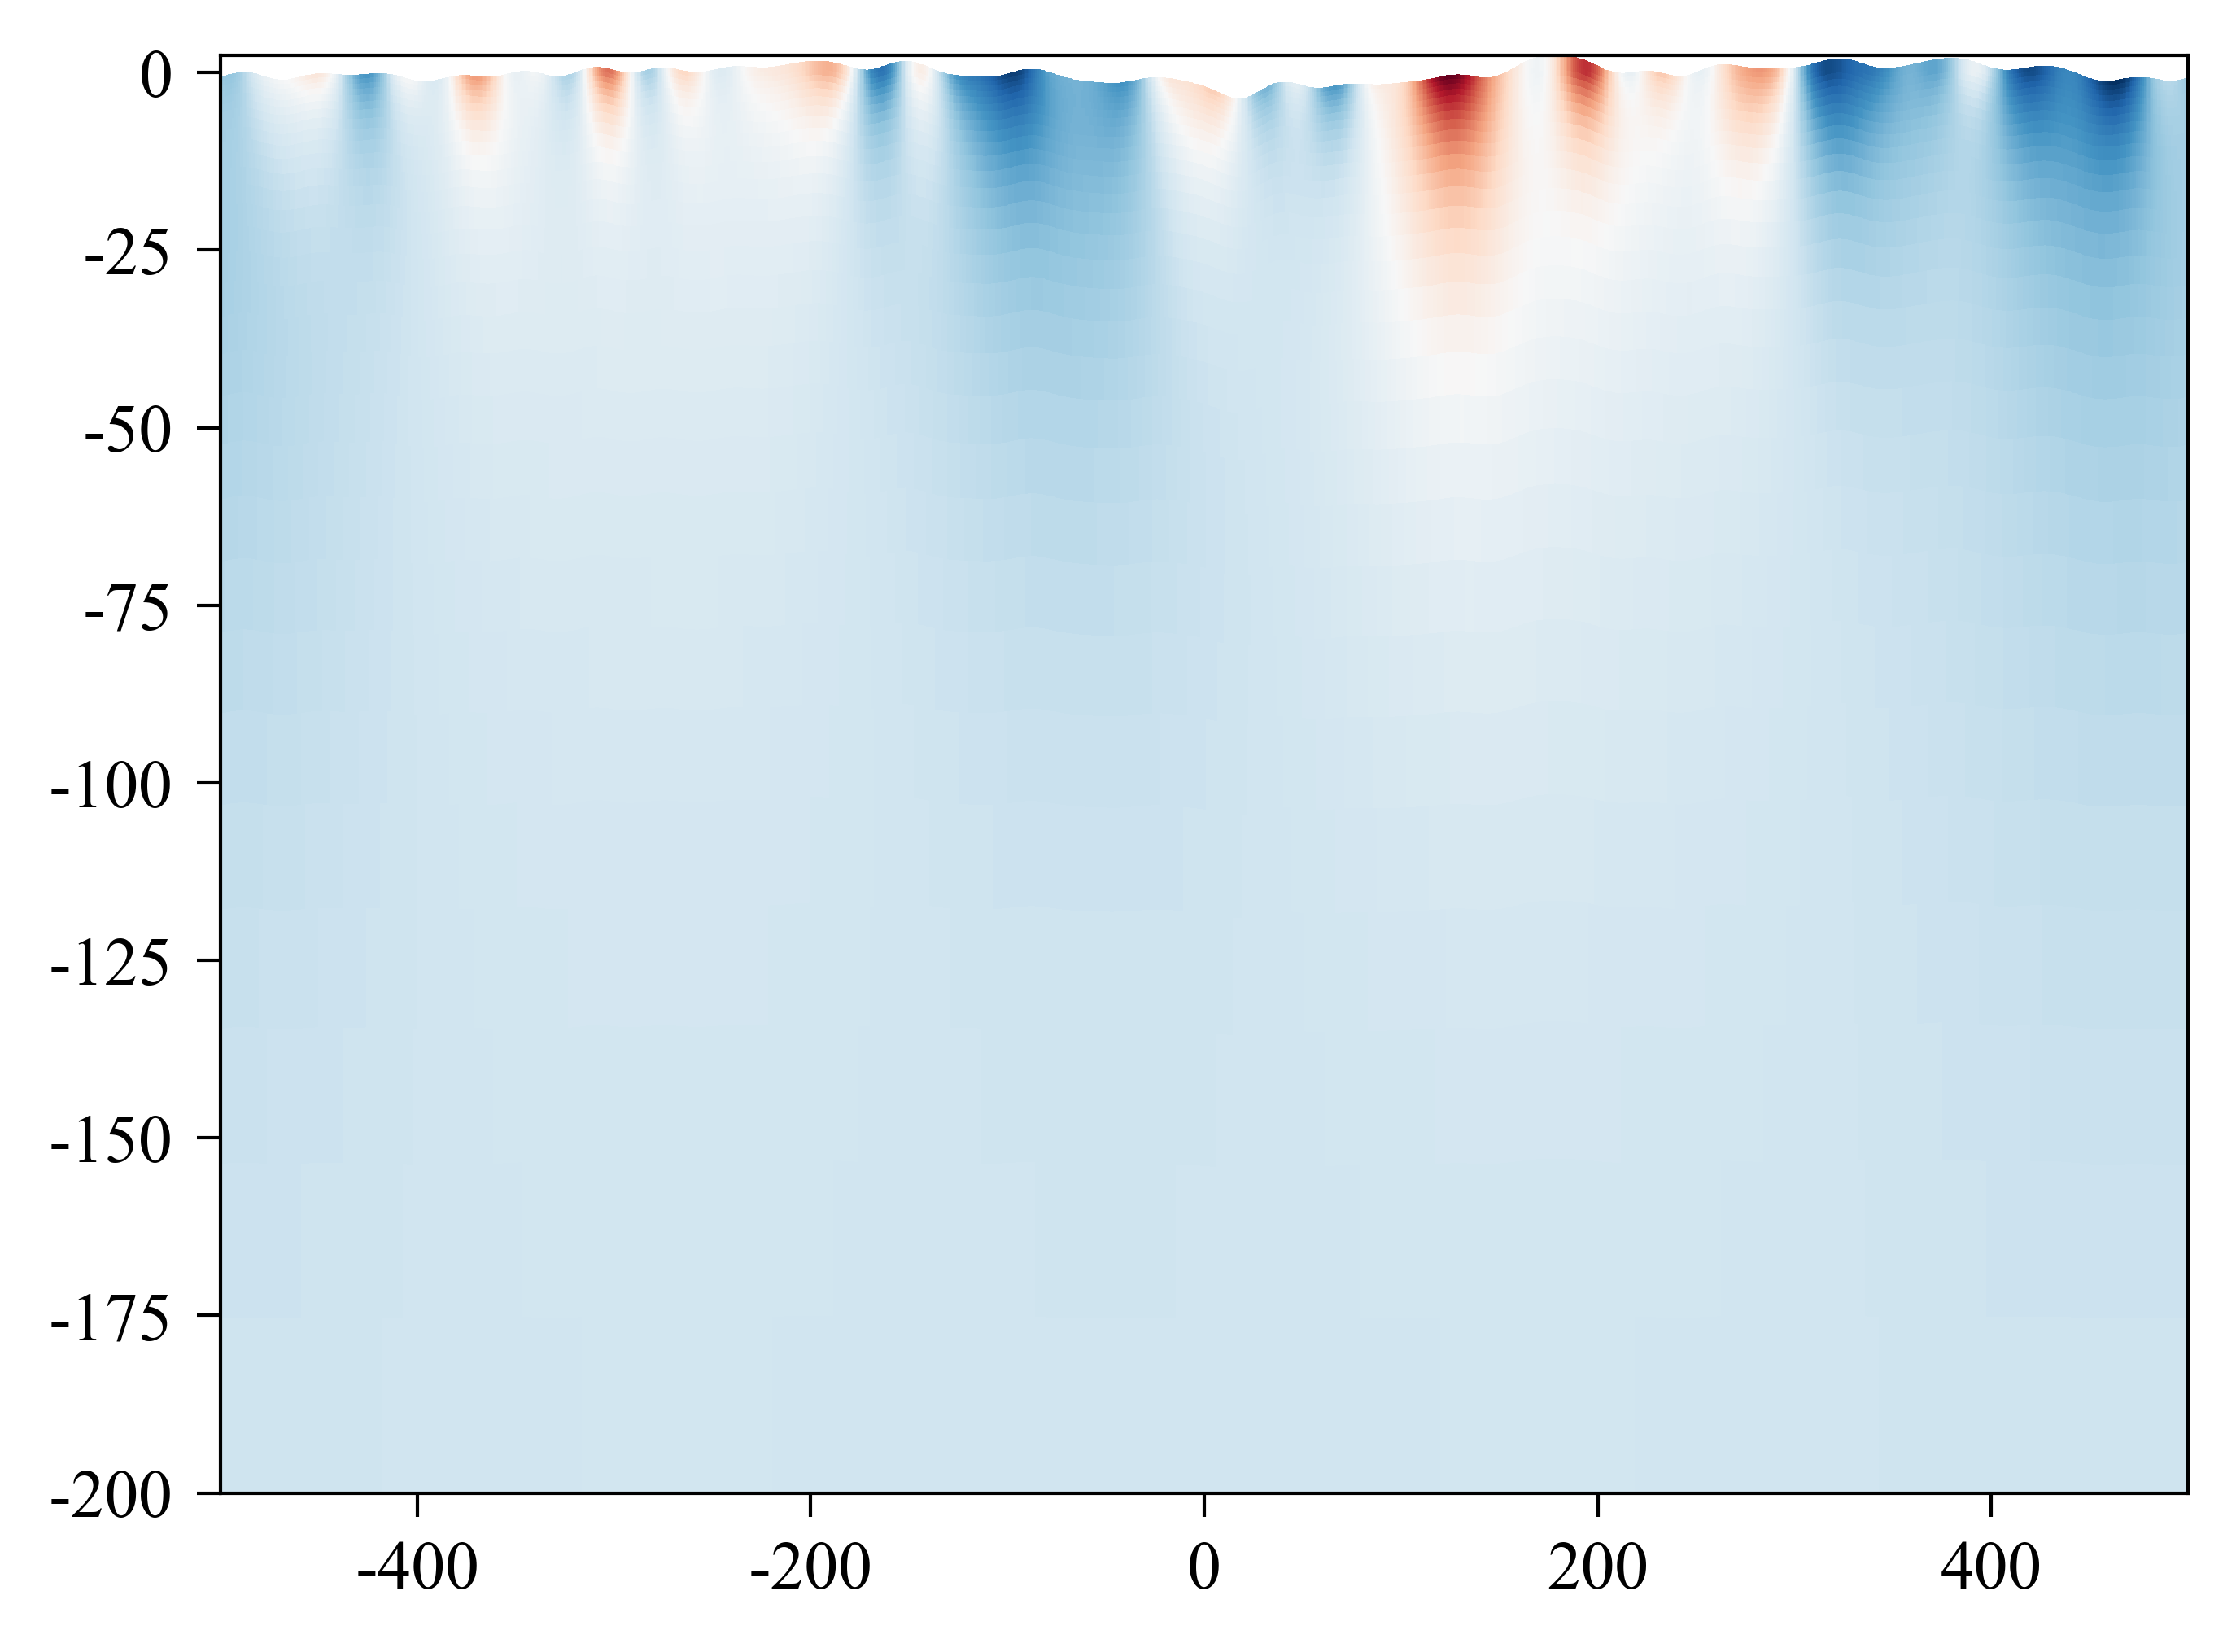

In [453]:
# Pick a case
filepath='/projects/DEIKE/jiarongw/multilayer/field_new_200m_P0.02_RE40000_10_15_rand2_Htheta0.503_N10/'
# Pick time and spatial resolution
time = np.arange(10.1,120,0.1) # All we need is that this time series is longer than Nt
spectrum_2d_series = np.zeros((Nt,N,N), dtype=np.float32)
for i in range(0, Nt):
    filename = filepath + 'surface/eta_matrix_%g' %time[i]
    eta = np.fromfile(filename, dtype=np.float32)
    eta = eta.reshape(N+1,N+1); eta = eta[1:,1:]
    spectrum = np.fft.fft2(eta) / (N*N)**0.5 # Shouldn't need to divide by Nt?
    F = np.absolute(spectrum)**2 / N**2 / (dkx*dky)
    F_center = np.fft.fftshift(F, axes=(0,1))
    spectrum_2d_series[i] = F_center